# 五、	設計指定之股票的正向或逆向投資策略

設計一個系統，提供使用者輸入特定股票，並設計該特定股票之正向與逆向投資策略，以及計算該策略最後報酬率。

In [292]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Apr  6 18:05:03 2020

@author: liuqingxuan
"""

import pandas as pd
import pandas_datareader.data as pdr
import datetime as datetime
from pandas.plotting import register_matplotlib_converters
import matplotlib.pyplot as plt

stock_number = '2330.TW'
start = datetime.datetime(2019,1,1)
end = datetime.datetime(2020,6,1)
DataFrame = pdr.DataReader(stock_number, 'yahoo', start, end)
num = len(DataFrame)

#計算每日報酬率
DataFrame['TurnOver']=0.00000
for i in range(1,num):
    DataFrame['TurnOver'][i] = (DataFrame['Close'][i]-DataFrame['Close'][i-1])/DataFrame['Close'][i-1]

print(DataFrame)

             High    Low   Open  Close      Volume   Adj Close  TurnOver
Date                                                                    
2019-01-02  226.5  219.0  226.5  219.5  32900482.0  207.299652  0.000000
2019-01-03  218.0  214.0  214.0  215.5  34087620.0  203.521988 -0.018223
2019-01-04  211.5  206.5  211.5  208.0  65943521.0  196.438858 -0.034803
2019-01-07  214.0  211.0  212.0  213.0  35442176.0  201.160965  0.024038
2019-01-08  212.5  210.0  212.0  211.0  22694481.0  199.272125 -0.009390
...           ...    ...    ...    ...         ...         ...       ...
2020-05-26  297.5  293.5  295.0  295.5  33856481.0  295.500000  0.011986
2020-05-27  298.0  295.5  297.0  296.5  23375959.0  296.500000  0.003384
2020-05-28  298.5  293.0  298.5  294.0  28444568.0  294.000000 -0.008432
2020-05-29  292.5  290.0  292.0  292.0  79774181.0  292.000000 -0.006803
2020-06-01  296.5  293.5  294.0  295.5  35811214.0  295.500000  0.011986

[338 rows x 7 columns]


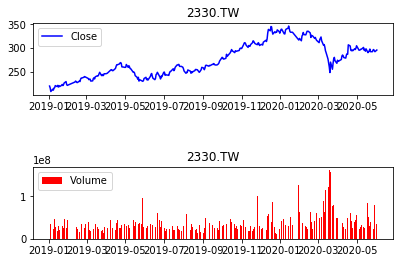

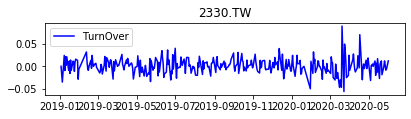

In [293]:
#畫圖
fig = plt.figure(figsize=(5, 5))
AX  = fig.add_axes([0.1,0.5,1,0.2])
AX2 = fig.add_axes([0.1,0.1,1,0.2])
fig2 = plt.figure(figsize=(5, 5))
AX3 = fig2.add_axes([0.1,0.1,1,0.2])

#表格標題
AX.set_title(stock_number)
AX2.set_title(stock_number)
AX3.set_title(stock_number)

#收盤價
AX.plot(DataFrame['Close'], label='Close', color='B')
#成交量
AX2.bar(DataFrame.index, DataFrame['Volume'], label='Volume', color='R')
#TurnOver
AX3.plot(DataFrame['TurnOver'], label='TurnOver', color='B')

AX.legend();
AX2.legend();
AX3.legend();

In [357]:
#正向操作
#True/False
DataFrame['TF']=0
for i in range(num):
    if DataFrame['TurnOver'][i] > 0.0316:
        DataFrame['TF'][i] = 1 #漲幅大於0.002時 TF為1
    else:
        DataFrame['TF'][i] = 0 #小於則為0

print(DataFrame)

             High    Low   Open  Close      Volume   Adj Close  TurnOver  TF  \
Date                                                                           
2019-01-02  226.5  219.0  226.5  219.5  32900482.0  207.299652  0.000000   0   
2019-01-03  218.0  214.0  214.0  215.5  34087620.0  203.521988 -0.018223   0   
2019-01-04  211.5  206.5  211.5  208.0  65943521.0  196.438858 -0.034803   0   
2019-01-07  214.0  211.0  212.0  213.0  35442176.0  201.160965  0.024038   0   
2019-01-08  212.5  210.0  212.0  211.0  22694481.0  199.272125 -0.009390   0   
...           ...    ...    ...    ...         ...         ...       ...  ..   
2020-05-26  297.5  293.5  295.0  295.5  33856481.0  295.500000  0.011986   0   
2020-05-27  298.0  295.5  297.0  296.5  23375959.0  296.500000  0.003384   0   
2020-05-28  298.5  293.0  298.5  294.0  28444568.0  294.000000 -0.008432   0   
2020-05-29  292.5  290.0  292.0  292.0  79774181.0  292.000000 -0.006803   0   
2020-06-01  296.5  293.5  294.0  295.5  

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [358]:
num = len(DataFrame['TF'])
num

338

In [359]:
num = len(DataFrame['TF'])

#買賣動作欄位
DataFrame['PL']=0.000000
#購買價格
long=0.000000

n=2 #因為看到第二筆，才有資料可以判斷，如果是weekly要設7，以此類推
while(n<num): #當n小於所有筆數時，繼續執行以下程式
    if(DataFrame['TF'][n-1]==0 and DataFrame['TF'][n]==1): #當大漲的事實觸發時
        long= float(DataFrame['Close'][n])#趕快尾盤跳下去買
        while (DataFrame['TF'][n]==1 and n<num):#當大漲情況維持，則持續hold
            if n==num-1:
                break
            n +=1 #筆數往後看
        DataFrame['PL'][n]=(DataFrame['Close'][n])-(long)-(DataFrame['Close'][n])*0.00585 #當大漲情況消失時執行(while不成立時執行)，也就是賣掉股票，此值為獲利
    n=n+1

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [360]:
print(DataFrame)

             High    Low   Open  Close      Volume   Adj Close  TurnOver  TF  \
Date                                                                           
2019-01-02  226.5  219.0  226.5  219.5  32900482.0  207.299652  0.000000   0   
2019-01-03  218.0  214.0  214.0  215.5  34087620.0  203.521988 -0.018223   0   
2019-01-04  211.5  206.5  211.5  208.0  65943521.0  196.438858 -0.034803   0   
2019-01-07  214.0  211.0  212.0  213.0  35442176.0  201.160965  0.024038   0   
2019-01-08  212.5  210.0  212.0  211.0  22694481.0  199.272125 -0.009390   0   
...           ...    ...    ...    ...         ...         ...       ...  ..   
2020-05-26  297.5  293.5  295.0  295.5  33856481.0  295.500000  0.011986   0   
2020-05-27  298.0  295.5  297.0  296.5  23375959.0  296.500000  0.003384   0   
2020-05-28  298.5  293.0  298.5  294.0  28444568.0  294.000000 -0.008432   0   
2020-05-29  292.5  290.0  292.0  292.0  79774181.0  292.000000 -0.006803   0   
2020-06-01  296.5  293.5  294.0  295.5  

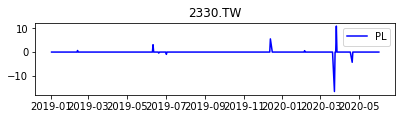

In [361]:
#畫圖
fig = plt.figure(figsize=(5, 5))
AX  = fig.add_axes([0.1,0.5,1,0.2])

#表格標題
AX.set_title(stock_number)

#收盤價
AX.plot(DataFrame['PL'], label='PL', color='B')

AX.legend();

In [362]:
total=0
for i in range(len(DataFrame['PL'])):
    total+=DataFrame['PL'][i]
print(total)

-1.4728999999999992


In [387]:
#逆向操作
#True/False
DataFrame['TF']=0
for i in range(num):
    if DataFrame['TurnOver'][i] < -0.03:
        DataFrame['TF'][i] = 1 #跌幅大於0.018時 TF為1
    else:
        DataFrame['TF'][i] = 0 #小於則為0

#print(DataFrame)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [388]:
num = len(DataFrame['TF'])

#買賣動作欄位
DataFrame['PL']=0.000000
#購買價格
long=0.000000

n=2 #因為看到第二筆，才有資料可以判斷，如果是weekly要設7，以此類推
while(n<num): #當n小於所有筆數時，繼續執行以下程式
    if(DataFrame['TF'][n-1]==0 and DataFrame['TF'][n]==1): #當大漲的事實觸發時
        long= float(DataFrame['Close'][n])#趕快尾盤跳下去買
        while (DataFrame['TF'][n]==1 and n<num):#當大漲情況維持，則持續hold
            if n==num-1:
                break
            n +=1 #筆數往後看
        DataFrame['PL'][n]=(DataFrame['Close'][n])-(long)-(DataFrame['Close'][n])*0.00585 #當大漲情況消失時執行(while不成立時執行)，也就是賣掉股票，此值為獲利
    n=n+1
print(DataFrame)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


             High    Low   Open  Close      Volume   Adj Close  TurnOver  TF  \
Date                                                                           
2019-01-02  226.5  219.0  226.5  219.5  32900482.0  207.299652  0.000000   0   
2019-01-03  218.0  214.0  214.0  215.5  34087620.0  203.521988 -0.018223   0   
2019-01-04  211.5  206.5  211.5  208.0  65943521.0  196.438858 -0.034803   1   
2019-01-07  214.0  211.0  212.0  213.0  35442176.0  201.160965  0.024038   0   
2019-01-08  212.5  210.0  212.0  211.0  22694481.0  199.272125 -0.009390   0   
...           ...    ...    ...    ...         ...         ...       ...  ..   
2020-05-26  297.5  293.5  295.0  295.5  33856481.0  295.500000  0.011986   0   
2020-05-27  298.0  295.5  297.0  296.5  23375959.0  296.500000  0.003384   0   
2020-05-28  298.5  293.0  298.5  294.0  28444568.0  294.000000 -0.008432   0   
2020-05-29  292.5  290.0  292.0  292.0  79774181.0  292.000000 -0.006803   0   
2020-06-01  296.5  293.5  294.0  295.5  

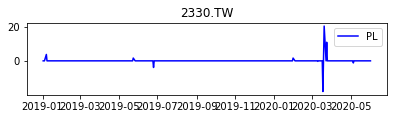

In [389]:
#畫圖
fig = plt.figure(figsize=(5, 5))
AX  = fig.add_axes([0.1,0.5,1,0.2])

#表格標題
AX.set_title(stock_number)

#收盤價
AX.plot(DataFrame['PL'], label='PL', color='B')

AX.legend();

In [390]:
total=0
for i in range(len(DataFrame['PL'])):
    total+=DataFrame['PL'][i]
print(total) #累積獲利

14.933674999999997
